<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/Zadanie_3_MiTMOvPZ_%D0%AF%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%9C%D0%B8%D1%85%D0%B0%D0%B8%D0%BB_6015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

1. Применить классификацию деревом решений с заданным max_depth к своему датасету. Построить график зависимости accuracy на тренировочном и тестовом поднаборах от max_depth дерева.
2. Найти GridSearchCV оптимальный max_depth.

https://www.kaggle.com/datasets/yakhyojon/national-basketball-association-nba

# Задача классификации

**Имя столбца	Описание столбца**

name	Имя игрока НБА

gp	Количество сыгранных игр

min	Количество сыгранных минут за игру

pts	Среднее количество очков за игру

fgm	Среднее количество бросков с игры за игру

fga	Среднее количество попыток бросков с игры за игру

fg	Средний процент попаданий с игры за игру

3p_made	Среднее количество трехочковых бросков с игры за игру

3pa	Среднее количество трехочковых бросков с игры за игру

3p	Средний процент трехочковых бросков с игры, забитых за игру

ftm	Среднее количество штрафных бросков за игру

fta	Среднее количество попыток штрафных бросков за игру

ft	Средний процент штрафных бросков за игру

oreb	Среднее количество подборов в атаке за игру

dreb	Среднее количество подборов в защите за игру

reb	Среднее количество подборов за игру

ast	Среднее количество передач за игру

stl	Среднее количество перехватов за игру

blk	Среднее количество блоков за игру

tov	Среднее количество потерь за игру

target_5yrs	1, если продолжительность карьеры >= 5 лет, 0 в противном случае.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/nba-players.csv')

In [ ]:
df.shape

(1340, 22)

In [ ]:
df.sample(5)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
265,265,Billy Donovan,44,8.3,2.4,1.0,2.5,40.4,0.0,0.2,...,0.5,81.0,0.1,0.5,0.6,2.0,0.4,0.0,0.9,0
721,721,Austin Daye,69,13.3,5.1,2.0,4.3,46.4,0.4,1.4,...,0.8,82.1,0.5,2.0,2.5,0.5,0.4,0.4,0.7,1
1276,1276,George Lynch,71,24.8,9.6,4.1,8.1,50.8,0.0,0.1,...,2.3,59.6,3.1,2.7,5.8,1.4,1.4,0.4,1.2,1
727,727,DeMarre Carroll,71,11.2,2.9,1.2,3.1,39.6,0.0,0.1,...,0.7,62.3,0.7,1.4,2.1,0.5,0.4,0.1,0.3,1
494,494,Jay Vincent,81,32.4,21.4,8.9,17.9,49.7,0.0,0.0,...,5.0,71.6,2.2,4.7,7.0,2.2,1.1,0.3,2.4,1


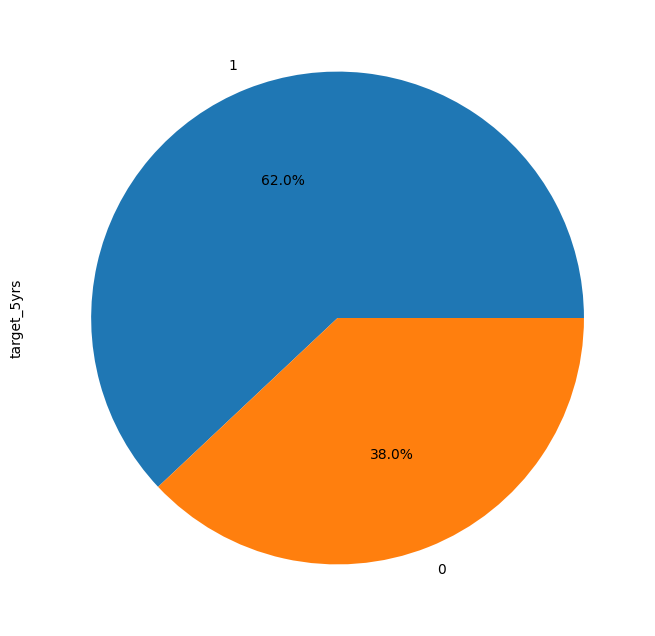

In [ ]:
plt.figure(figsize=(8, 8))
df.target_5yrs.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
df.isna().sum()

Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [ ]:
features = ["gp","min", "pts", "fgm", "fga", "fg", "3p_made", "3pa", "3p", "ftm", "fta", "ft", "oreb", "dreb", "reb", "ast", "stl", "blk", "tov"]

In [ ]:
df = df.iloc [: , 1:]
df

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [ ]:
df.shape

(1340, 21)

In [ ]:
y = df.target_5yrs.values
X = df[features]
X

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=5)
first_tree

DecisionTreeClassifier(max_depth=5, random_state=13)

In [ ]:
try:
  first_tree.fit(X_train, y_train)
except Exception as e:
  print(e)

In [ ]:
X

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [ ]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, class_names=['Not target_5yrs', 'target_5yrs'], filled=True)

In [ ]:
!cat first_tree.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="gp <= 63.5\ngini = 0.472\nsamples = 1005\nvalue = [384, 621]\nclass = target_5yrs", fillcolor="#b3daf5"] ;
1 [label="oreb <= 0.75\ngini = 0.49\nsamples = 506\nvalue = [288, 218]\nclass = Not target_5yrs", fillcolor="#f9e0cf"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fga <= 6.25\ngini = 0.443\nsamples = 320\nvalue = [214, 106]\nclass = Not target_5yrs", fillcolor="#f2bf9b"] ;
1 -> 2 ;
3 [label="ft <= 77.4\ngini = 0.421\nsamples = 289\nvalue = [202, 87]\nclass = Not target_5yrs", fillcolor="#f0b78e"] ;
2 -> 3 ;
4 [label="fga <= 2.15\ngini = 0.38\nsamples = 216\nvalue = [161, 55]\nclass = Not target_5yrs", fillcolor="#eeac7d"] ;
3 -> 4 ;
5 [label="gini = 0.489\nsamples = 40\nvalue = [23, 17]\nclass = Not target_5yrs", fillcolor="#f8decb"] ;
4 -> 5 ;
6 [label="gini = 0.339\nsamples = 176\nvalue = [138, 38]\nclass = Not target_5yrs",

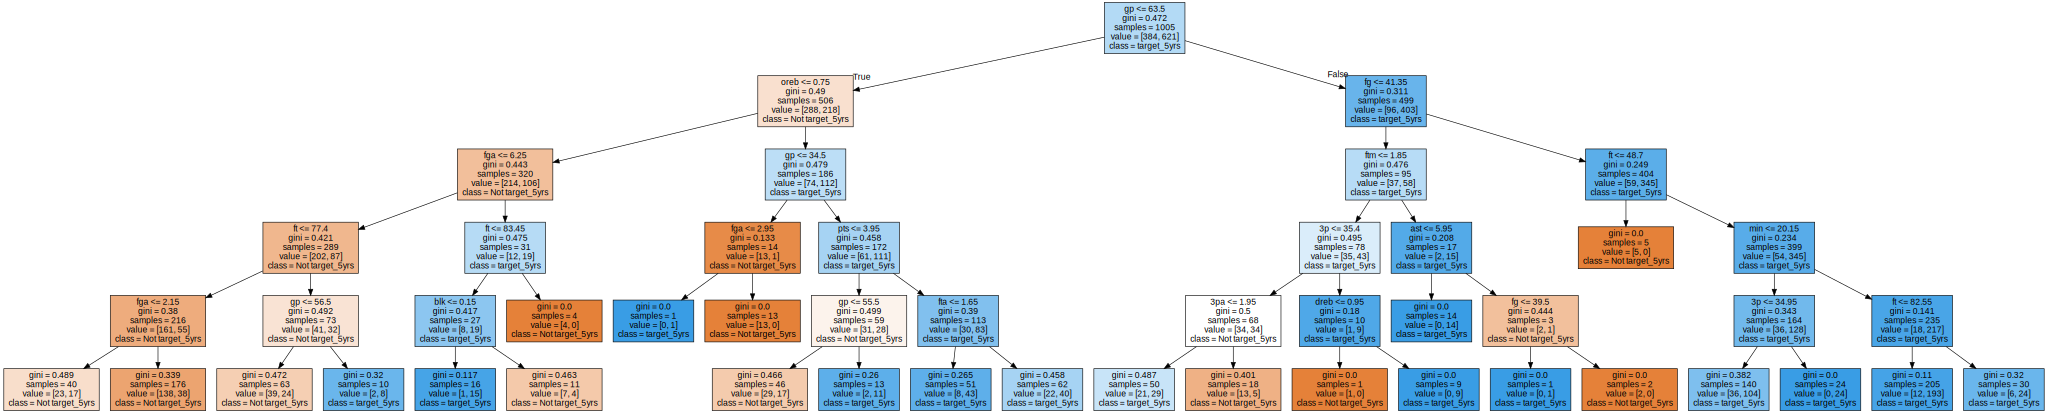

In [ ]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

Построить график зависимости accuracy на тренировочном и тестовом поднаборах от max_depth дерева.

In [ ]:
y_pred = first_tree.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2], int)
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  126

Error Persentage :  37.61194029850746

Accuracy :  62.38805970149254

Validation set Shape : 335


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
y = [1] * 9 + [0]
pred = [1] * 10
y, pred

([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y, pred), balanced_accuracy_score(y, pred)

(0.9, 0.5)

In [ ]:
recall_score([1,1,1,0,0,0], [1,1,0,1,0,0]), recall_score([1,1,1,0,0,0], [1,1,1,1,1,1]), recall_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 1.0, 0.3333333333333333)

In [ ]:
precision_score([1,1,1,0,0,0], [1,1,0,1,0,0]), precision_score([1,1,1,0,0,0], [1,1,1,1,1,1]), precision_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 0.5, 1.0)

In [ ]:
f1_score([1,1,1,0,0,0], [1,1,0,1,0,0]), f1_score([1,1,1,0,0,0], [1,1,1,1,1,1]), f1_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 0.6666666666666666, 0.5)

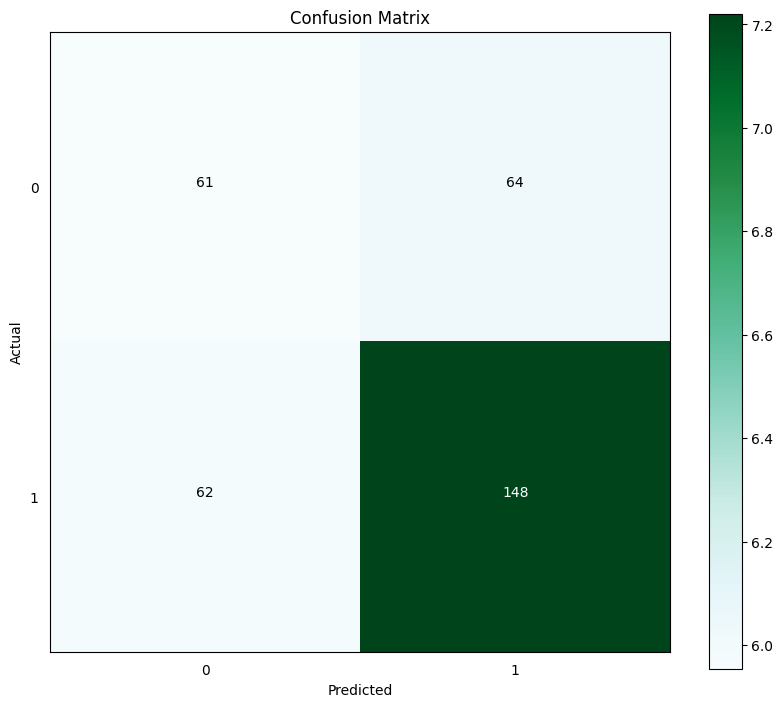

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Найти GridSearchCV оптимальный max_depth.**

In [ ]:
depths = np.arange(1, 21)
features = [.25, .5, .7, 1]
tree_params = {'max_depth': depths,  'max_features': features}

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10, n_jobs=-1)

In [ ]:
try:
  tree_grid.fit(X_train, y_train)
  tree_grid.best_score_, tree_grid.best_params_
except Exception as e:
  print(e)

In [ ]:
tree_bp = DecisionTreeClassifier(max_depth=4, max_features=0.25, random_state=13)

In [ ]:
tree_bp.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.25, random_state=13)

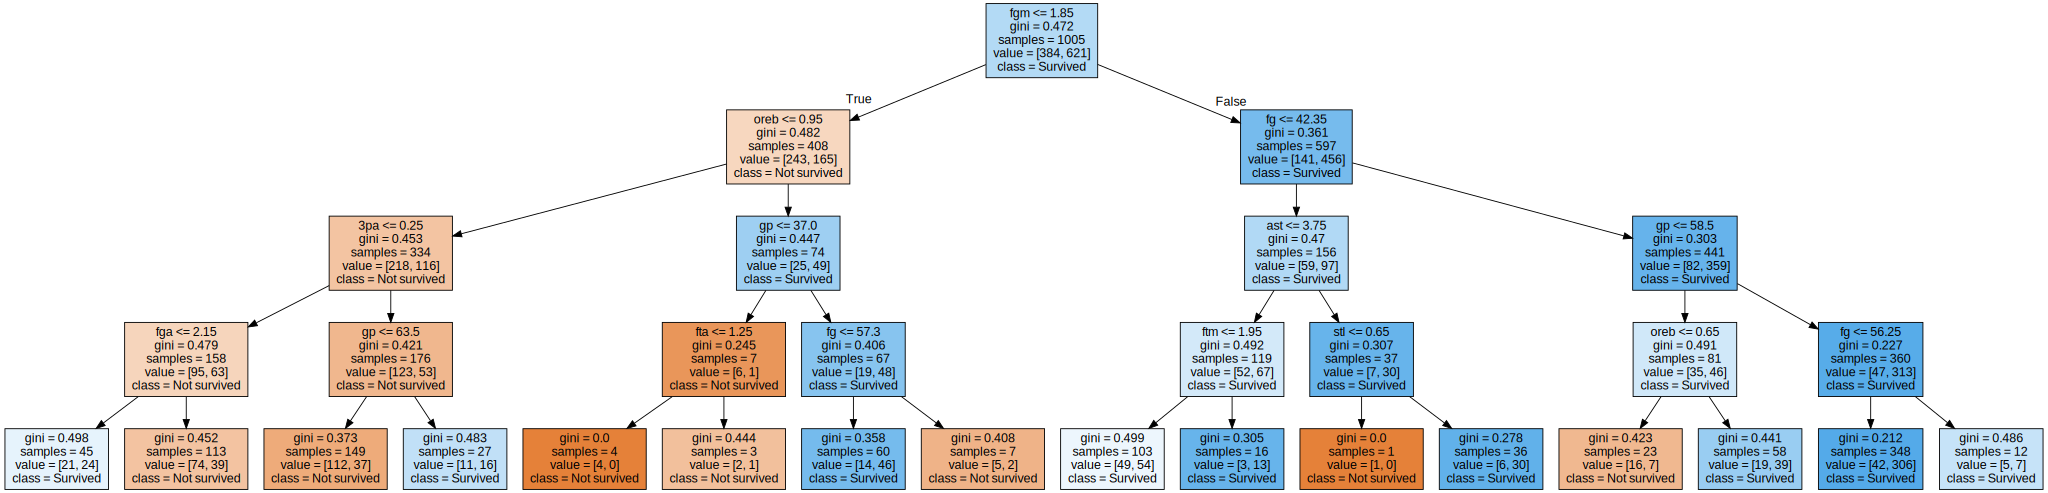

In [ ]:
export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
y_pred = tree_bp.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  132

Error Persentage :  39.40298507462686

Accuracy :  60.59701492537314

Validation set Shape : 335


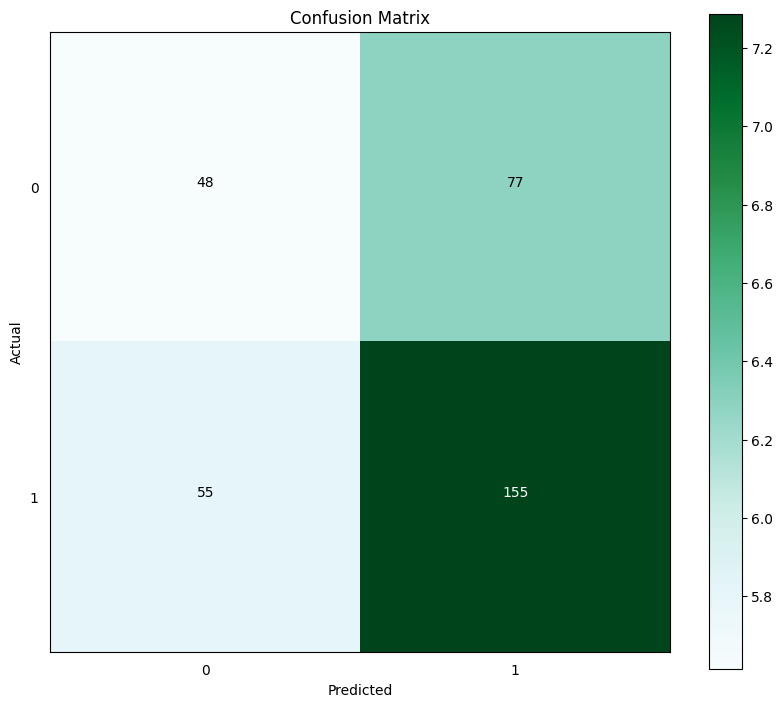

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

https://www.kaggle.com/code/emstrakhov/lab-practice-decision-trees-and-random-forest